# 2021 CVE Data Review

This notebook will pull all [JSON Data](https://nvd.nist.gov/vuln/data-feeds#JSON_FEED) from the NVD and performs some basic data analysis of CVEd data. 

## Getting Started

### Import Python Libraries

In [15]:

from IPython.core.magic import register_cell_magic
from IPython.display import Markdown
import datetime
import glob
import json
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

@register_cell_magic
def markdown(line, cell):
    return Markdown(cell.format(**globals()))


logging.getLogger('matplotlib.font_manager').disabled = True
warnings.filterwarnings("ignore")


# CVE Data

### Build Base DataFrame

This code builds a Panda dataframe from the JSON files we downloaded, removing all CVE's marked rejected.

In [16]:
row_accumulator = []
for filename in glob.glob('nvdcve-1.1-*.json'):
    with open(filename, 'r', encoding='utf-8') as f:
        nvd_data = json.load(f)
        for entry in nvd_data['CVE_Items']:
            cve = entry['cve']['CVE_data_meta']['ID']
            try:
                assigner = entry['cve']['CVE_data_meta']['ASSIGNER']
            except KeyError:
                published_date = 'Missing_Data'
            try:
                published_date = entry['publishedDate']
            except KeyError:
                published_date = 'Missing_Data'
            try:
                attack_vector = entry['impact']['baseMetricV3']['cvssV3']['attackVector']
            except KeyError:
                attack_vector = 'Missing_Data'
            try:
                attack_complexity = entry['impact']['baseMetricV3']['cvssV3']['attackComplexity']
            except KeyError:
                attack_complexity = 'Missing_Data'
            try:
                privileges_required = entry['impact']['baseMetricV3']['cvssV3']['privilegesRequired']
            except KeyError:
                privileges_required = 'Missing_Data'
            try:
                user_interaction = entry['impact']['baseMetricV3']['cvssV3']['userInteraction']
            except KeyError:
                user_interaction = 'Missing_Data'
            try:
                scope = entry['impact']['baseMetricV3']['cvssV3']['scope']
            except KeyError:
                scope = 'Missing_Data'
            try:
                confidentiality_impact = entry['impact']['baseMetricV3']['cvssV3']['confidentialityImpact']
            except KeyError:
                confidentiality_impact = 'Missing_Data'
            try:
                integrity_impact = entry['impact']['baseMetricV3']['cvssV3']['integrityImpact']
            except KeyError:
                integrity_impact = 'Missing_Data'
            try:
                availability_impact = entry['impact']['baseMetricV3']['cvssV3']['availabilityImpact']
            except KeyError:
                availability_impact = 'Missing_Data'
            try:
                base_score = entry['impact']['baseMetricV3']['cvssV3']['baseScore']
            except KeyError:
                base_score = '0.0'
            try:
                base_severity = entry['impact']['baseMetricV3']['cvssV3']['baseSeverity']
            except KeyError:
                base_severity = 'Missing_Data'
            try:
                exploitability_score = entry['impact']['baseMetricV3']['exploitabilityScore']
            except KeyError:
                exploitability_score = 'Missing_Data'
            try:
                impact_score = entry['impact']['baseMetricV3']['impactScore']
            except KeyError:
                impact_score = 'Missing_Data'
            try:
                cwe = entry['cve']['problemtype']['problemtype_data'][0]['description'][0]['value']
            except IndexError:
                cwe = 'Missing_Data'
            try:
                description = entry['cve']['description']['description_data'][0]['value']
            except IndexError:
                description = ''
            new_row = { 
                'CVE': cve, 
                'Published': published_date,
                'AttackVector': attack_vector,
                'AttackComplexity': attack_complexity,
                'PrivilegesRequired': privileges_required,
                'UserInteraction': user_interaction,
                'Scope': scope,
                'ConfidentialityImpact': confidentiality_impact,
                'IntegrityImpact': integrity_impact,
                'AvailabilityImpact': availability_impact,
                'BaseScore': base_score,
                'BaseSeverity': base_severity,
                'ExploitabilityScore': exploitability_score,
                'ImpactScore': impact_score,
                'CWE': cwe,
                'Description': description,
                'Assigner' : assigner
            }
            if not description.startswith('** REJECT **'): # disputed, rejected and other non issues start with '**'
                row_accumulator.append(new_row)
        nvd = pd.DataFrame(row_accumulator)
    

nvd['Published'] = pd.to_datetime(nvd['Published'])
thisyear = ((nvd['Published'] > '2021-01-01') & (nvd['Published']  < '2021-12-31'))
nvd = nvd.loc[thisyear]
nvd = nvd.sort_values(by=['Published'])
nvd = nvd.reset_index(drop=True)
print ('CVEs from NVD in 2021:', nvd['CVE'].count())

CVEs from NVD in 2021: 20062


In [17]:
Month_Graph = nvd['Published'].groupby(nvd.Published.dt.to_period("M")).agg('count')
Year_Graph = nvd['Published'].groupby(nvd.Published.dt.to_period("Y")).agg('count')
Week_Graph = nvd['Published'].groupby(nvd.Published.dt.to_period("W")).agg('count')
Day_Graph = nvd['Published'].groupby(nvd.Published.dt.to_period("D")).agg('count')
Dayofweek_Graph = nvd['Published'].groupby(nvd.Published.dt.to_period("H")).agg('count')
Year_Graph

Published
2021    20062
Freq: A-DEC, Name: Published, dtype: int64

In [18]:
print("Published CVEs in 2021")
print("CVE-1999-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-1999-')]))
print("CVE-2000-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2000-')]))
print("CVE-2001-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2001-')]))
print("CVE-2002-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2002-')]))
print("CVE-2003-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2003-')]))
print("CVE-2004-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2004-')]))
print("CVE-2005-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2005-')]))
print("CVE-2006-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2006-')]))
print("CVE-2007-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2007-')]))
print("CVE-2008-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2008-')]))
print("CVE-2009-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2009-')]))
print("CVE-2010-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2010-')]))
print("CVE-2011-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2011-')]))
print("CVE-2012-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2012-')]))
print("CVE-2013-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2013-')]))
print("CVE-2014-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2014-')]))
print("CVE-2015-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2015-')]))
print("CVE-2016-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2016-')]))
print("CVE-2017-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2017-')]))
print("CVE-2018-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2018-')]))
print("CVE-2019-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2019-')]))
print("CVE-2020-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2020-')]))
print("CVE-2021-\t%s" % len(nvd[nvd['CVE'].str.contains('CVE-2021-')]))

Published CVEs in 2021
CVE-1999-	0
CVE-2000-	0
CVE-2001-	0
CVE-2002-	2
CVE-2003-	0
CVE-2004-	0
CVE-2005-	0
CVE-2006-	0
CVE-2007-	1
CVE-2008-	2
CVE-2009-	4
CVE-2010-	11
CVE-2011-	9
CVE-2012-	4
CVE-2013-	10
CVE-2014-	1
CVE-2015-	13
CVE-2016-	14
CVE-2017-	29
CVE-2018-	77
CVE-2019-	151
CVE-2020-	3615
CVE-2021-	16119


FileNotFoundError: [Errno 2] No such file or directory: 'CVEs_Month.jpg'

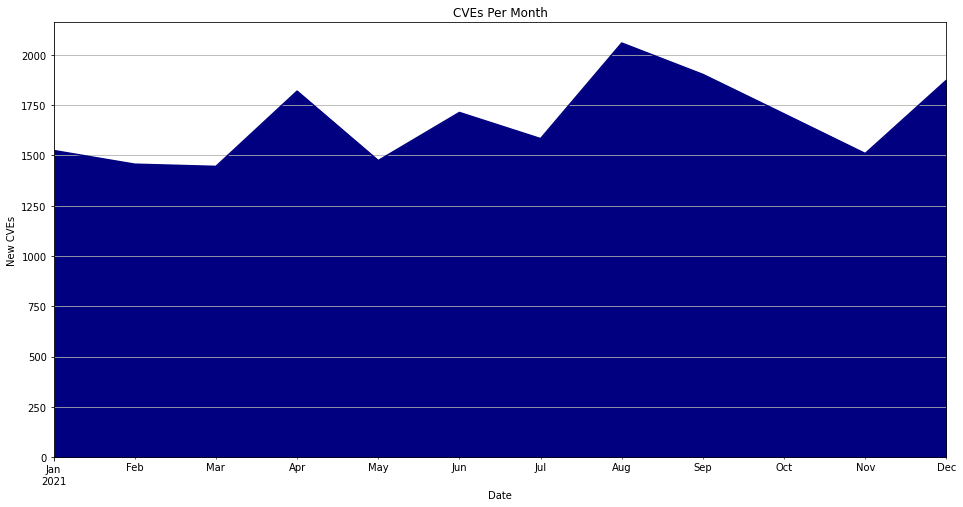

In [19]:
cg = Month_Graph.plot.area(colormap='jet', figsize=(16, 8), title='CVEs Per Month')
plt.grid()
cg.set_ylabel("New CVEs")
cg.set_xlabel("Date")
plt.savefig('CVEs_Month.jpg', dpi=300, bbox_inches='tight')

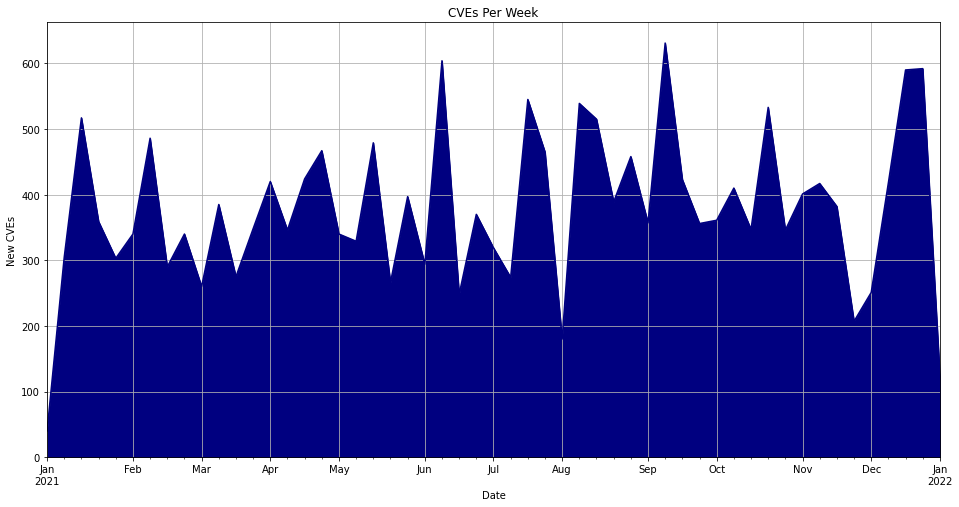

In [ ]:
cg = Week_Graph.plot.area(colormap='jet', figsize=(16, 8), title='CVEs Per Week')
plt.grid()
cg.set_ylabel("New CVEs")
cg.set_xlabel("Date")
plt.savefig('CVEs_Week.jpg', dpi=300, bbox_inches='tight')

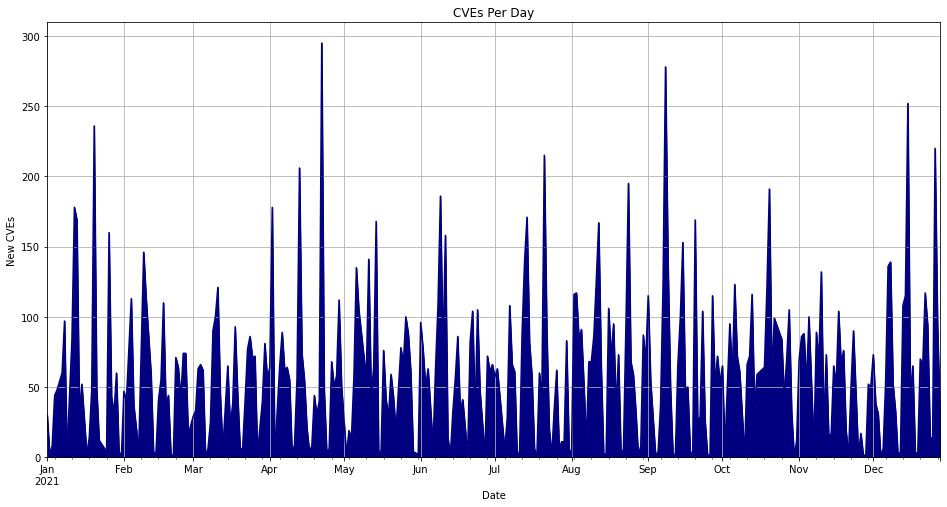

In [ ]:
cg = Day_Graph.plot.area(colormap='jet', figsize=(16, 8), title='CVEs Per Day')
plt.grid()
cg.set_ylabel("New CVEs")
cg.set_xlabel("Date")
plt.savefig('CVEs_Day.jpg', dpi=300, bbox_inches='tight')

In [ ]:
nvd_frequency = nvd['Assigner'].value_counts()
nvd_frequency = nvd_frequency.reset_index()
nvd_frequency.columns = ['Assigner', 'counts']
nvd_frequency[nvd_frequency.counts > 100].head(50)
nvd_frequency_no_mitre = nvd_frequency[~nvd_frequency.Assigner.str.contains('cve@mitre.org')]
nvd_frequency_no_mitre = nvd_frequency_no_mitre[nvd_frequency_no_mitre.counts > 100].head(20)
nvd_frequency_no_mitre

,Assigner,counts
1,security-advisories@github.com,1065
2,secure@microsoft.com,870
3,contact@wpscan.com,747
4,psirt@us.ibm.com,604
5,secalert_us@oracle.com,586
6,psirt@cisco.com,586
7,security@android.com,530
8,secalert@redhat.com,456
9,psirt@adobe.com,431
10,product-security@apple.com,409


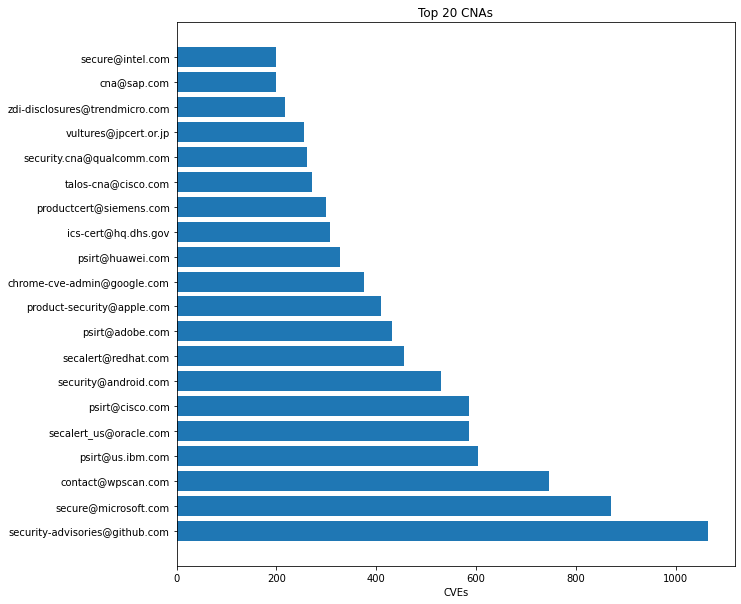

In [ ]:
plt.figure(figsize=(10,10))
plt.barh("Assigner", "counts", data = nvd_frequency_no_mitre)
plt.xlabel("CVEs") 
plt.ylabel("") 
plt.title("Top 20 CNAs")
plt.savefig('2021topassinger.jpg', dpi=300, bbox_inches='tight')

In [ ]:
nvd.head(5)

,CVE,Published,AttackVector,AttackComplexity,PrivilegesRequired,UserInteraction,Scope,ConfidentialityImpact,IntegrityImpact,AvailabilityImpact,BaseScore,BaseSeverity,ExploitabilityScore,ImpactScore,CWE,Description,Assigner
0,CVE-2016-20007,2021-01-01 00:15:00+00:00,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,NONE,NONE,7.5,HIGH,3.9,3.6,CWE-613,The REST/JSON project 7.x-1.x for Drupal allow...,cve@mitre.org
1,CVE-2016-20008,2021-01-01 00:15:00+00:00,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,NONE,NONE,7.5,HIGH,3.9,3.6,NVD-CWE-Other,The REST/JSON project 7.x-1.x for Drupal allow...,cve@mitre.org
2,CVE-2016-20006,2021-01-01 00:15:00+00:00,NETWORK,LOW,NONE,NONE,UNCHANGED,NONE,NONE,HIGH,7.5,HIGH,3.9,3.6,NVD-CWE-noinfo,The REST/JSON project 7.x-1.x for Drupal allow...,cve@mitre.org
3,CVE-2017-20001,2021-01-01 01:15:00+00:00,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,NONE,NONE,7.5,HIGH,3.9,3.6,CWE-326,The AES encryption project 7.x and 8.x for Dru...,cve@mitre.org
4,CVE-2016-20005,2021-01-01 01:15:00+00:00,NETWORK,LOW,NONE,NONE,UNCHANGED,HIGH,HIGH,HIGH,9.8,CRITICAL,3.9,5.9,CWE-863,The REST/JSON project 7.x-1.x for Drupal allow...,cve@mitre.org


## Last 5 CVEs 

In [ ]:
nvd.tail(5)

,CVE,Published,AttackVector,AttackComplexity,PrivilegesRequired,UserInteraction,Scope,ConfidentialityImpact,IntegrityImpact,AvailabilityImpact,BaseScore,BaseSeverity,ExploitabilityScore,ImpactScore,CWE,Description,Assigner
20057,CVE-2021-44832,2021-12-28 20:15:00+00:00,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,0.0,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Apache Log4j2 versions 2.0-beta7 through 2.17....,security@apache.org
20058,CVE-2020-7878,2021-12-28 20:15:00+00:00,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,0.0,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,An arbitrary file download and execution vulne...,vuln@krcert.or.kr
20059,CVE-2020-22061,2021-12-28 20:15:00+00:00,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,0.0,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,SUPERAntispyware v8.0.0.1050 was discovered to...,cve@mitre.org
20060,CVE-2020-22057,2021-12-28 20:15:00+00:00,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,0.0,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,The WinRin0x64.sys and WinRing0.sys low-level ...,cve@mitre.org
20061,CVE-2020-7883,2021-12-28 20:15:00+00:00,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,0.0,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Missing_Data_JG,Printchaser v2.2021.804.1 and earlier versions...,vuln@krcert.or.kr


In [ ]:
Markdown(f"This report is updated automatically every day, last generated on: **{datetime.date.today()}**")

This report is updated automatically every day, last generated on: **2021-12-29**